In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [21]:
# Create actual dataset
data = pd.DataFrame({
    'age': [45, 34, 54, 23, 40, 36, 50, 29, 60, 31],
    'income': [85000, 60000, 120000, 40000, 95000, 80000, 100000, 50000, 130000, 70000],
    'loan_amount': [25000, 15000, 30000, 10000, 22000, 18000, 27000, 12000, 35000, 16000],
    'employment_status': [1, 1, 1, 0, 1, 1, 1, 0, 1, 1],  # 0 for unemployed, 1 for employed
    'credit_score': [720, 680, 750, 650, 700, 710, 740, 660, 780, 690],
    'credit_risk': [0, 1, 0, 1, 0, 0, 0, 1, 0, 1]  # 0 for low risk, 1 for high risk
})

In [22]:
# Features and target variable selection
X = data[['age', 'income', 'loan_amount', 'employment_status', 'credit_score']]
y = data['credit_risk']

In [23]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [24]:
# Instantiate the Random Forest Classifier model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

In [25]:
# Fit the model on training data
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [26]:
# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Print a detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 100.00%

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         1

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



In [27]:
# Feature importance analysis
importances = rf_model.feature_importances_
feature_names = X.columns
for feature, importance in zip(feature_names, importances):
    print(f'Feature: {feature}, Importance: {importance:.4f}')

Feature: age, Importance: 0.2292
Feature: income, Importance: 0.2188
Feature: loan_amount, Importance: 0.2188
Feature: employment_status, Importance: 0.1042
Feature: credit_score, Importance: 0.2292


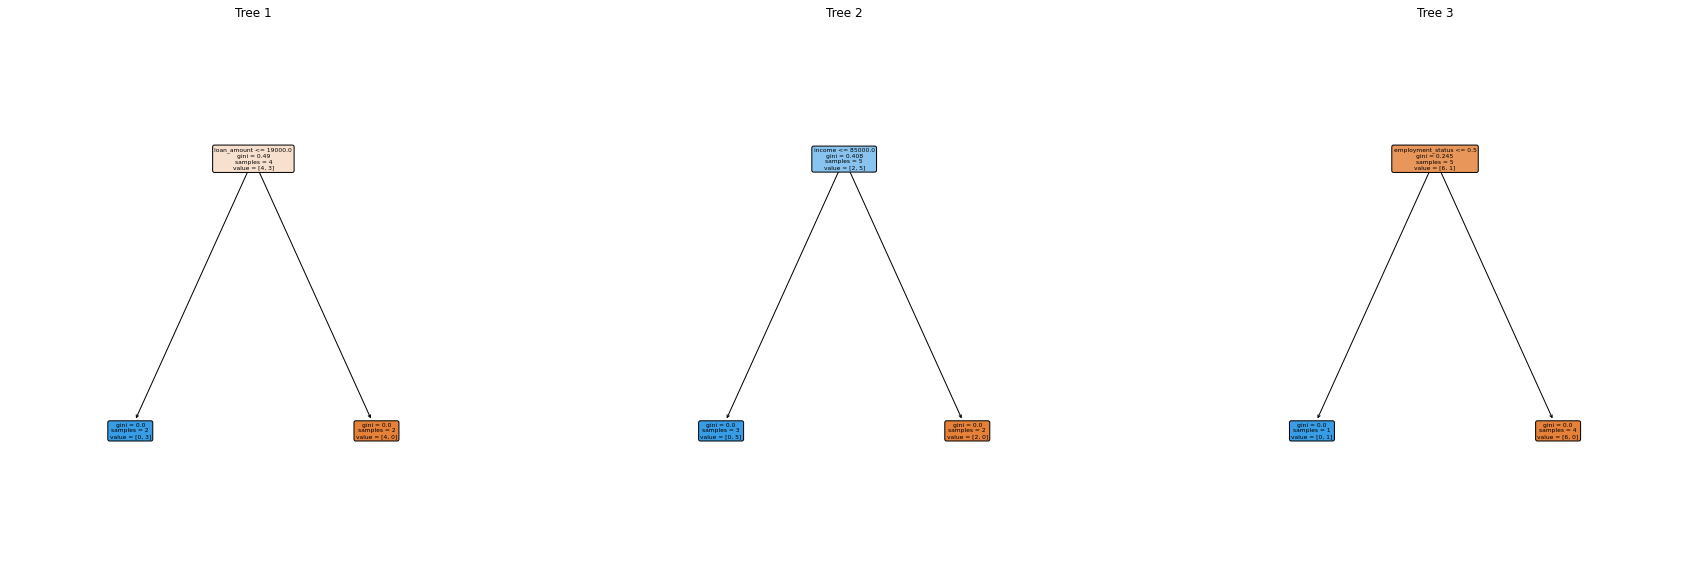

In [28]:
# Plot only 3 decision trees from the Random Forest
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(30, 10))

for i, estimator in enumerate(rf_model.estimators_[:3]):
    plot_tree(estimator, feature_names=feature_names, filled=True, rounded=True, fontsize=6, ax=axes[i])
    axes[i].set_title(f'Tree {i + 1}')

In [30]:
# Predicting credit risk for a new loan applicant
new_applicant = pd.DataFrame({'age': [34], 'income': [60000], 'loan_amount': [15000], 'employment_status': [1], 'credit_score': [720]})

prediction = rf_model.predict(new_applicant)

if prediction == 1:
    print("Credit risk: High (Not eligible for loan)")
else:
    print("Credit risk: Low (Eligible for loan)")

Credit risk: High (Not eligible for loan)
